In [9]:
import requests, zipfile, io, os
from urllib.parse import urljoin
import pandas as pd

base_url = "https://www.bart.gov/sites/default/files/docs/ridership_"

save_dir = os.path.join(os.getcwd(), "BART Reports")
os.makedirs(save_dir, exist_ok=True)

for year in range(2011,2021):
    target_url = base_url + str(year) + ".zip"
    r = requests.get(target_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(save_dir)


In [22]:
import shutil
for year in range(2013,2022):
    folder_get_path = "c:\\Users\\carso\\OneDrive - UW-Madison\\23_24_Fall\\econ695\\lecture\\Bart Reports\\ridership_"+str(year)
    folder_put_path = "c:\\Users\\carso\\OneDrive - UW-Madison\\23_24_Fall\\econ695\\lecture\\Bart Reports"
    if os.path.exists(folder_get_path) and os.path.exists(folder_put_path):
        files_to_move = [f for f in os.listdir(folder_get_path) if os.path.isfile(os.path.join(folder_get_path, f))]

        for file_to_move in files_to_move:
            source = os.path.join(folder_get_path, file_to_move)
            destination_file = os.path.join(folder_put_path, file_to_move)

            shutil.move(source, destination_file)

In [24]:
def delete_all_folders(directory):
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)

        if os.path.isdir(folder_path):
            os.rmdir(folder_path)

path = "c:\\Users\\carso\\OneDrive - UW-Madison\\23_24_Fall\\econ695\\lecture\\Bart Reports"
delete_all_folders(path)

In [32]:
def rename_file(directory):
    for filename in os.listdir(directory):
        current_file_path = os.path.join(directory, filename)
        if str(year) in filename:
            file_name, file_extension = os.path.splitext(filename)

            new_filename = str(year)+file_name
            new_file_path = os.path.join(directory, new_filename + file_extension)
            os.rename(current_file_path, new_file_path)


path = "c:\\Users\\carso\\OneDrive - UW-Madison\\23_24_Fall\\econ695\\lecture\\Bart Reports"

for year in range(2011,2022):
    rename_file(path)

In [33]:
def replace_month_with_code(directory):
    month_code_mapping = {
        "January": "01", "February": "02", "March": "03", "April": "04", "May": "05", 
        "June": "06", "July": "07", "August": "08", "September": "09", "October": "10", 
        "November": "11", "December": "12"
    }

    for filename in os.listdir(directory):
        current_file_path = os.path.join(directory, filename)
        file_name, file_extension = os.path.splitext(filename)

        for month_name, month_code in month_code_mapping.items():
            if month_name in file_name:
                new_file_name = file_name.replace(month_name, '_'+month_code+'_')
                new_file_path = os.path.join(directory, f'{new_file_name}{file_extension}')
                os.rename(current_file_path, new_file_path)


path = "c:\\Users\\carso\\OneDrive - UW-Madison\\23_24_Fall\\econ695\\lecture\\Bart Reports"

replace_month_with_code(path)

In [ ]:
def rename_files(directory, specific_string):
    for filename in os.listdir(directory):
        current_file_path = os.path.join(directory, filename)
        pattern = re.compile(re.escape(specific_string) + '_20')


In [38]:
import requests, zipfile, io
import pandas as pd

years = ["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_nums = ["01","02","03","04","05","06","07","08","09","10","11","12"]
years_extra = ["2013","2014","2015","2016","2017"]
last_years = ["2018","2019","2020","2021"]
dfs_dates = []
dfs = []

for year in years:
    r = requests.get(f"https://www.bart.gov/sites/default/files/docs/ridership_{year}.zip")
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('c:\\Users\\carso\\OneDrive - UW-Madison\\23_24_Fall\\econ695\\lecture\\ridership')

    if year in years_extra:
        for month in months:
            file = f"ridership/ridership_{year}/Ridership_{month}{year}.xlsx"
            df = pd.read_excel(file, sheet_name='Weekday OD', header=1, index_col=0, nrows=43, usecols=range(44)).fillna('')
            dfs_dates.append(f"{month}_{year}")
            dfs.append(df)
    elif year in last_years:
        for month in month_nums:
            file = f"ridership/ridership_{year}/Ridership_{year}{month}.xlsx"
            if year == '2019' or year == '2020':
                df = pd.read_excel(file, sheet_name='Avg Weekday OD', header=1, index_col=0, nrows=43, usecols=range(44)).fillna('')
                dfs_dates.append(f"{month}_{year}")
                dfs.append(df)
            else:
                if year == "2018" and  month == "01":
                    df = pd.read_excel(file, sheet_name='Weekday OD', header=1, index_col=0, nrows=43, usecols=range(44)).fillna('')
                    dfs_dates.append(f"{month}_{year}")
                    dfs.append(df)
                else:
                    df = pd.read_excel(file, sheet_name='Avg Weekday OD', header=1, index_col=0, nrows=43, usecols=range(44)).fillna('')
                    dfs_dates.append(f"{month}_{year}")
                    dfs.append(df)
    else:
        for month in months:
            file = f"ridership/Ridership_{month}{year}.xlsx"
            df = pd.read_excel(file, sheet_name='Weekday OD', header=1, index_col=0, nrows=43, usecols=range(44)).fillna('')
            dfs_dates.append(f"{month}_{year}")
            dfs.append(df)

trans_dfs = []
for df in dfs:
    stacked_df = df.stack()
    stacked_df = stacked_df.reset_index()
    stacked_df.columns = ['row_value', 'col_name', 'value']
    stacked_df['index_name'] = stacked_df['row_value'].astype(str) + '-' + stacked_df['col_name'].astype(str)
    result_df = stacked_df.set_index('index_name')[['value']]
    result_df = result_df.rename(columns={"value": "year"})
    trans_dfs.append(result_df)

compiled_df = pd.concat(trans_dfs, axis=1, join='inner')
compiled_df.columns = dfs_dates
compiled_df

,January_2012,February_2012,March_2012,April_2012,May_2012,June_2012,July_2012,August_2012,September_2012,October_2012,...,03_2021,04_2021,05_2021,06_2021,07_2021,08_2021,09_2021,10_2021,11_2021,12_2021
index_name,,,,,,,,,,,,,,,,,,,,,
RM-RM,7.00,7.30,7.954545,8.333333,8.863636,10.285714,7.809524,7.434783,9.000000,11.000000,...,8.347826,13.272727,8.00,10.545455,11.363636,7.545455,15.045455,10.619048,11.545455,11.782609
RM-EN,130.75,131.10,126.136364,128.809524,127.090909,128.476190,118.476190,130.217391,134.684211,135.181818,...,28.913043,33.272727,39.05,37.318182,37.681818,57.000000,67.727273,66.952381,58.363636,51.347826
RM-EP,115.45,115.00,112.136364,111.285714,121.045455,109.095238,99.000000,104.956522,118.947368,119.090909,...,25.956522,30.272727,29.85,27.727273,28.818182,40.772727,46.000000,47.095238,41.681818,43.043478
RM-NB,86.45,100.90,97.818182,100.428571,108.090909,86.285714,84.666667,84.347826,114.157895,113.136364,...,19.565217,22.909091,23.15,25.636364,28.454545,31.363636,31.454545,30.904762,31.318182,27.913043
RM-BK,368.80,419.35,406.818182,408.904762,408.363636,383.571429,380.952381,393.304348,465.263158,456.181818,...,72.173913,81.636364,91.35,94.681818,101.681818,144.636364,188.090909,191.952381,173.090909,147.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-WP,30.90,29.90,27.909091,27.904762,28.136364,28.333333,30.809524,32.130435,30.578947,35.954545,...,3.217391,3.136364,2.85,3.818182,2.227273,2.227273,3.727273,3.809524,2.181818,2.043478
MB-SS,54.75,55.40,50.954545,49.666667,60.409091,51.952381,53.095238,57.913043,67.526316,70.272727,...,6.130435,8.909091,10.25,13.000000,14.772727,14.590909,16.272727,16.904762,16.909091,11.043478
MB-SB,70.60,75.85,72.409091,76.857143,70.681818,71.047619,70.857143,69.826087,73.947368,80.000000,...,4.086957,4.545455,5.05,6.863636,8.318182,7.454545,12.954545,13.523810,12.409091,6.869565


In [49]:
compiled_df.to_csv('inclass3.csv')

In [98]:
yearly_per_change = {}
max_dict = {}
min_dict = {}

for month_num, month in zip(month_nums,months):
    per_change = (compiled_df[f"{month_num}_2021"] - compiled_df[f"{month}_2012"]) / compiled_df[F"{month}_2012"] * 100
    yearly_per_change[f"{month} Max"] = f"{per_change.idxmax()}, {per_change.max()}"
    yearly_per_change[f"{month} Min"] = f"{per_change.idxmin()}, {per_change.min()}"
    max_dict[month] = per_change.max()
    min_dict[month] = per_change.min()


print("largest increase:", yearly_per_change[f"{max(max_dict)} Max"])
print("largest decrease:", yearly_per_change[f"{min(min_dict)} Min"])

largest increase: RM-RM, 67.17171717171718
largest decrease: FM-LF, -99.62419470293486


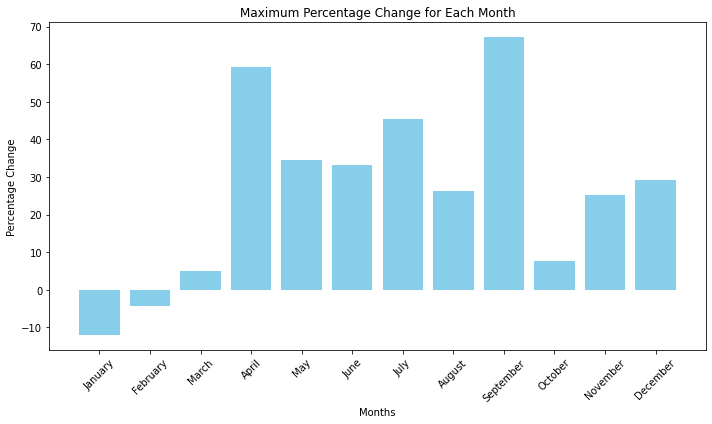

In [99]:
import matplotlib.pyplot as plt
# Create a bar chart of Maximum Percentage Change for Each Month
plt.figure(figsize=(10, 6))
plt.bar(max_dict.keys(), max_dict.values(), color='skyblue')
plt.xlabel('Months')
plt.ylabel('Percentage Change')
plt.title('Maximum Percentage Change for Each Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

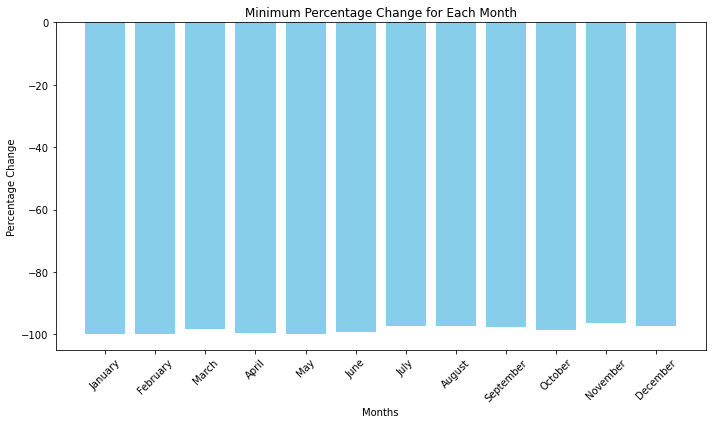

In [101]:
# Create a bar chart of Minimum Percentage Change for Each Month
plt.figure(figsize=(10, 6))
plt.bar(min_dict.keys(), min_dict.values(), color='skyblue')
plt.xlabel('Months')
plt.ylabel('Percentage Change')
plt.title('Minimum Percentage Change for Each Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()